# Indices Script
## written for 3 bands SODA sensor
### by Florian Beyer


### scipt calculates true color indices

### 2019-02-04



In [2]:
## Packages

import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [14]:
## Input directory
MS = 'N:\\Projekt_Wetscapes\\Bearbeitung\\2019_01_31_Huetelmoor\\rs_data\\001_Resampling\\2018_11_01_H_RGB_25cm_tif.tif'

## Output directory

suffix = '2018_11_01_H_RGB_25cm_'
save_path = 'N:\\Projekt_Wetscapes\\Bearbeitung\\2019_01_31_Huetelmoor\\rs_data\\005_indizes_RGB\\'

In [4]:
## read bands of MS dataset
with rasterio.open(MS) as src:
    b = src.read(3) # red edge
    b = b.astype('f4')
    g = src.read(2) # green
    g = g.astype('f4')
    r = src.read(1) # red
    r = r.astype('f4')
    
    

Text(0,0.5,u'Row #')

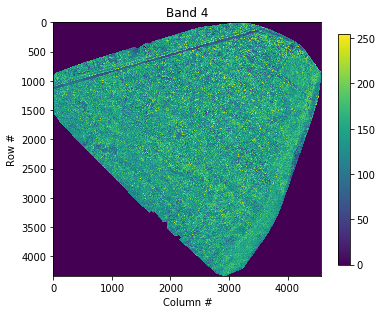

In [5]:
## plot the NIR band

plt.figure(figsize=(6,8.5))
plt.imshow(g)
plt.colorbar(shrink=0.5)
plt.title('Band 4')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [7]:
# Calculate indices

# https://agribotix.com/wp-content/uploads/2017/05/Agribotix-VARI-TGI-Study.pdf
vari = (g-r)/(g+r-b)
tgi = g-0.39*r-0.61*b

# https://www.sciencedirect.com/science/article/pii/S0303243412001791
ngrdi = (g-r)/(g+r)
gli = (2*g-r-b)/(2*g+r+b)


# https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/14-0005.1

gcc = g/(r+g+b)
exg = 2+g-(r+b)


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


In [8]:
indices = [vari,tgi,ngrdi,gli,gcc,exg]
indices_names = ['vari','tgi','ngrdi','gli','gcc','exg']

In [9]:
# generate mask image from red band
mask = np.copy(r)
mask[mask > 0.0] = 1.0 # all actual pixels have a value of 1.0
mask[mask == 0.0] = 'nan' # border values have no value 'nan'

In [10]:
indices_masked = []
for i in indices:
    temp = i*mask
    indices_masked.append(temp)
    temp = 'none'

Text(0,0.5,u'Row #')

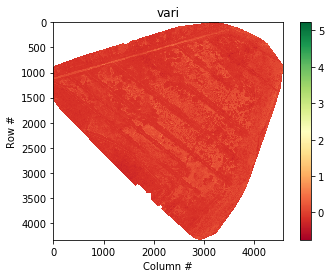

In [11]:
# plot ndvi as an example
plt.imshow(indices_masked[0], cmap='RdYlGn')
plt.colorbar()
plt.title('vari')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [12]:
# copy and update metadata from 4 bands to 1 band
with rasterio.open(MS) as src:
    print 'Meta data of the image dataset: {} \n\n'.format(src.profile)
    profile = src.profile.copy()
    
    profile.update({
        # all meta data are the same except the bands number
        'count': 1, # this is the important update from 4 bands to one band
        'crs': rasterio.crs.CRS({'init': u'epsg:32633'}),
        'interleave': 'pixel', 'dtype': 'float32',
        'driver': u'GTiff',
        'transform': rasterio.transform.Affine(0.25, 0.0, 315423.629, 0.0, -0.25, 6011303.437),
        'height': 4721,
        'width': 5224,
        'tiled': False,
        'nodata': None})
    print 'Meta data of the index dataset: {}'.format(profile)

Meta data of the image dataset: {'count': 4, 'crs': CRS({'init': u'epsg:32633'}), 'interleave': 'pixel', 'dtype': 'uint8', 'driver': u'GTiff', 'transform': Affine(0.25, 0.0, 315534.536,
       0.0, -0.25, 6011238.343), 'height': 4334, 'width': 4578, 'tiled': False, 'nodata': None} 


Meta data of the index dataset: {'count': 1, 'crs': CRS({'init': u'epsg:32633'}), 'width': 5224, 'dtype': 'float32', 'driver': u'GTiff', 'transform': Affine(0.25, 0.0, 315423.629,
       0.0, -0.25, 6011303.437), 'height': 4721, 'interleave': 'pixel', 'tiled': False, 'nodata': None}


In [15]:
# save all indices

for i in range(len(indices_masked)):
    filename = save_path+suffix+indices_names[i]+'.tif'
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1,indices_masked[i])
    


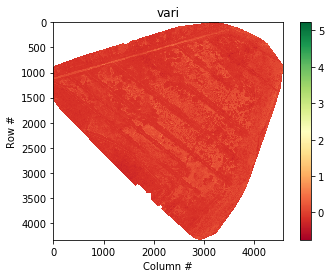

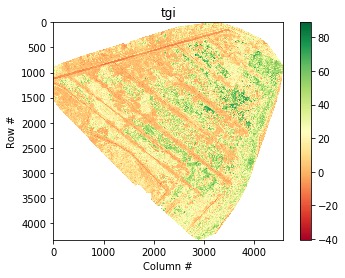

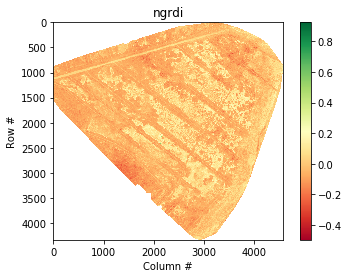

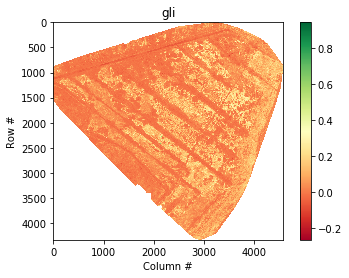

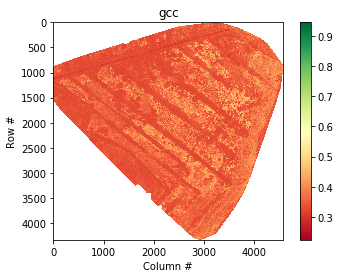

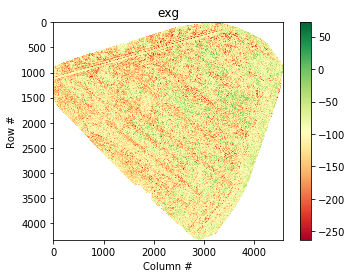

In [16]:
# plot all indices
for i in range(len(indices_masked)):
    plt.figure()
    plt.imshow(indices_masked[i], cmap='RdYlGn')
    plt.colorbar()
    plt.title(indices_names[i])
    plt.xlabel('Column #')
    plt.ylabel('Row #')